## Economy Data Analysis

In this analysis, we retrieved and processed monthly data for key economic indicators—GDP, Interest Rate, CPI, and Unemployment Rate—from FRED, spanning January 2010 to October 2024. Each indicator was adjusted to appropriate units: GDP in billions of USD, Interest Rate as a percentage, while CPI and Unemployment Rate remained unchanged.

---

1. We visualized each indicator’s trend over time using individual line plots, which highlight seasonal patterns and long-term movements. 

2. Additionally, we calculated and plotted the correlation matrix to examine the relationships between these indicators. The heatmap clearly shows the strength and direction of each correlation, providing insights into how these economic indicators are interrelated.

### Loading packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

### Data gathering

In [5]:
#Sample Data fetch 

# start_date = "2010-01-01"
# end_date = "2024-10-31"

# # Fetch CPI data from FRED
# try:
#     cpi_data = pdr.get_data_fred("CPIAUCSL", start=start_date, end=end_date)
#     cpi_data = cpi_data.resample('D').ffill()  # Resample to daily frequency and forward fill
# except:
#     pass

# print(cpi_data.head())

            CPIAUCSL
DATE                
2010-01-01   217.488
2010-01-02   217.488
2010-01-03   217.488
2010-01-04   217.488
2010-01-05   217.488


### Data Processing

In [ ]:
# Define the start and end dates
start_date = "2010-01-01"
end_date = "2024-10-31"

# Define the FRED tickers for the desired economic indicators
tickers = {
    "GDP": "GDP",               # US GDP
    "Interest_Rate": "DFF",      # Effective Federal Funds Rate
    "CPI": "CPIAUCSL",           # Consumer Price Index
    "Unemployment": "UNRATE"     # Unemployment Rate
}

# Fetch data and resample to monthly frequency
data = {}
for key, code in tickers.items():
    econ_data = pdr.get_data_fred(code, start=start_date, end=end_date)
    data[key] = econ_data 

# Combine data into a single DataFrame
df = pd.concat(data.values(), axis=1) # We save the fetched data into a library and now we concat each values into column

#for example 
#data = {'A':'a','B':'b','C':'c'}
#after concat it forms a dataframe:
# A B C
# a b c
df.columns = data.keys()  # Assign column names based on the ticker keys
df.dropna(inplace=True)  # Drop rows with missing values

print(df.tail())


                  GDP  Interest_Rate      CPI  Unemployment
DATE                                                       
2023-07-01  27967.697           5.08  304.628           3.5
2023-10-01  28296.967           5.33  307.531           3.8
2024-01-01  28624.069           5.33  309.685           3.7
2024-04-01  29016.714           5.33  313.207           3.9
2024-07-01  29349.924           5.33  313.534           4.3


### Plotting each indicator over time

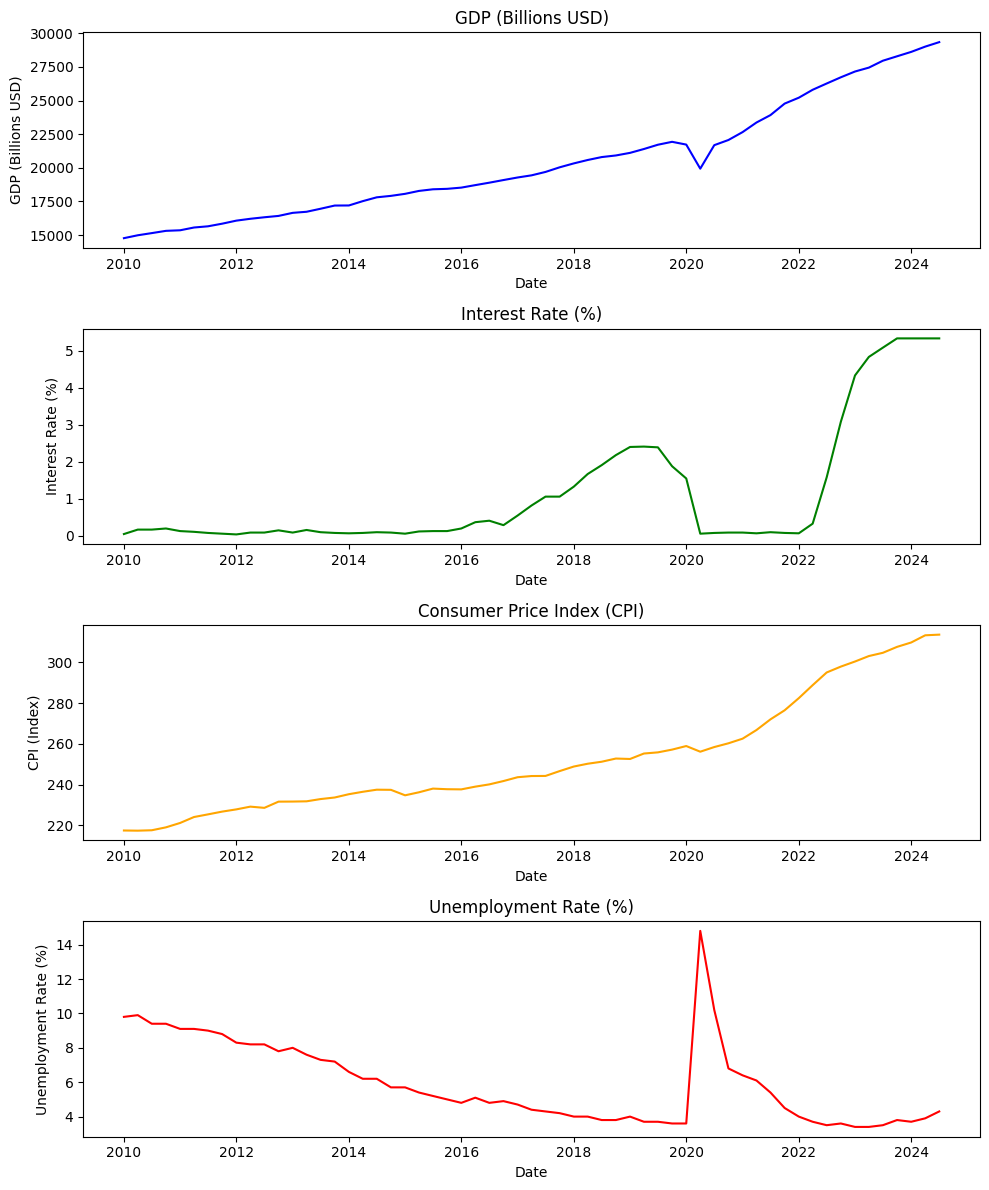

In [ ]:
# Create a figure (4x1)
plt.figure(figsize=(10, 12))

# Plot GDP
plt.subplot(4, 1, 1)
plt.plot(df.index, df['GDP'], color="blue")
plt.title("GDP (Billions USD)")
plt.xlabel("Date")
plt.ylabel("GDP (Billions USD)")
#plt.grid(True)

# Plot Interest Rate
plt.subplot(4, 1, 2)
plt.plot(df.index, df['Interest_Rate'], color="green")
plt.title("Interest Rate (%)")
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")


# Plot CPI
plt.subplot(4, 1, 3)
plt.plot(df.index, df['CPI'], color="orange")
plt.title("Consumer Price Index (CPI)")
plt.xlabel("Date")
plt.ylabel("CPI (Index)")


# Plot Unemployment Rate
plt.subplot(4, 1, 4)
plt.plot(df.index, df['Unemployment'], color="red")
plt.title("Unemployment Rate (%)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")

# Adjust layout for clarity
plt.tight_layout()
plt.show()



### Correlation Matrix Plot (seaborn sns)

A correlation matrix shows the relationships between multiple variables, with values ranging from -1 to 1:

Positive Correlation (near +1): When one variable increases, the other tends to increase. For example, GDP and interest rates may have a positive correlation in a growing economy.

Negative Correlation (near -1): When one variable increases, the other tends to decrease. For example, high unemployment and high GDP growth are often negatively correlated.

Near Zero Correlation: Indicates little to no linear relationship between variables.

Correlation Matrix:
                    GDP  Interest_Rate       CPI  Unemployment
GDP            1.000000       0.780686  0.992334     -0.643606
Interest_Rate  0.780686       1.000000  0.799645     -0.561137
CPI            0.992334       0.799645  1.000000     -0.592156
Unemployment  -0.643606      -0.561137 -0.592156      1.000000


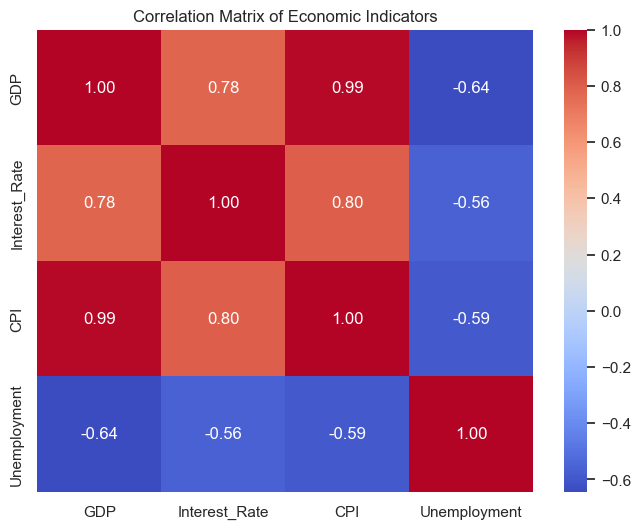

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True) 
#annot=True make correlation number on each cell
#fmt='.2f' keep 2 decimal numbers
#cbar=True, keep the color bar at side
plt.title("Correlation Matrix of Economic Indicators")
plt.show()